# V3 Dataset Creation & Descriptive Evaluation

## Install dependencies

In [ ]:
for (p in c("irr")) {
  if (!requireNamespace(p)) {
    install.packages(p)
  }
}

library(dplyr)
library(ggplot2)
library(tidyr)
library(irr)

Loading required namespace: irr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lpSolve’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lpSolve



In [ ]:
Participant <- read.csv(unzip("data.zip", "Participant.csv"))
Feedback <- read.csv(unzip("data.zip", "Feedback.csv"))
Article <- read.csv(unzip("data.zip", "Article.csv"))
Content <- read.csv(unzip("data.zip", "Content.csv"))

ArticleInfo <- read.csv("articles.csv")

## Descriptive

### Participant

In [ ]:
summary(Participant)

      id            dataProcessingConsent browserSignature  
 Length:158         Min.   :0             Length:158        
 Class :character   1st Qu.:0             Class :character  
 Mode  :character   Median :0             Mode  :character  
                    Mean   :0                               
                    3rd Qu.:0                               
                    Max.   :0                               
   createdAt        
 Min.   :1.678e+09  
 1st Qu.:1.678e+09  
 Median :1.678e+09  
 Mean   :1.678e+09  
 3rd Qu.:1.678e+09  
 Max.   :1.679e+09  

In [ ]:
nrow(Participant)

[1] 158

In [ ]:
ParticipantWithFeedback <- merge(Participant, Feedback, by.x = "id", by.y = "participantId") 
ParticipantWithFeedbackCount <- ParticipantWithFeedback %>% group_by(id) %>% summarise(
  n = n()
)

nrow(ParticipantWithFeedbackCount)

[1] 33

In [ ]:
mean(ParticipantWithFeedbackCount$n)
median(ParticipantWithFeedbackCount$n)

[1] 60.51515

[1] 16

### Article & Content

In [ ]:
# Preprocessing
ArticleWithContent <- merge(Article, Content, by.x = "id", by.y = "articleId") %>% filter(htmlType == "SPAN")

Article <- merge(Article, ArticleInfo, by="source")
Article$date <- as.POSIXct(Article$date, origin="1970-01-01")

In [ ]:
summary(Article)

    source               id               title             sitename        
 Length:12          Length:12          Length:12          Length:12         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    author               date                     inferenceAvailable
 Length:12          Min.   :2022-12-27 00:00:00   Min.   :1         
 Class :character   1st Qu.:2023-01-30 00:00:00   1st Qu.:1         
 Mode  :character   Median :2023-02-24 12:00:00   Median :1         
                    Mean   :2023-02-11 06:00:00   Mean   :1         
                    3rd Qu.:2023-02-28 00:00:00   3rd Qu.:1         
                    Max.   :2023-03-01 00:00:00

In [ ]:
unique(Article$topic)

[1] "abortion"                             
 [2] "immigration"                          
 [3] "gender"                               
 [4] "elections-2020"                       
 [5] "international-politics-and-world-news"
 [6] "gun-control"                          
 [7] "blm"                                  
 [8] "environment"                          
 [9] "white-nationalism"                    
[10] "middle-class"                         
[11] "coronavirus"                          
[12] "islam"

In [ ]:
unique(Article$sitename)

[1] "The Federalist"  "Alternet"        "Breitbart"       "Fox News"       
[5] "Reuters"         "TheBlaze"        "The Daily Beast" "The Guardian"

In [ ]:
nrow(Article[Article$credibleSource==1,])
nrow(Article[Article$credibleSource==0,])

[1] 11

[1] 1

In [ ]:
nrow(Article[Article$omitsOpinion==1,])
nrow(Article[Article$omitsOpinion==0,])

[1] 5

[1] 7

In [ ]:
df <- Article %>%
  group_by(bias) %>%
  summarise(
    n = n()
  )
df

bias,n
<chr>,<int>
high,6
low,3
medium,3


In [ ]:
df <- Article %>%
  group_by(slant) %>%
  summarise(
    n = n()
  )
df

slant,n
<chr>,<int>
,1
center,2
left,5
right,4


In [ ]:
summary(select(Article, c("biasPercentage", "date")))

 biasPercentage         date                    
 Min.   :0.00000   Min.   :2022-12-27 00:00:00  
 1st Qu.:0.05795   1st Qu.:2023-01-30 00:00:00  
 Median :0.18199   Median :2023-02-24 12:00:00  
 Mean   :0.23898   Mean   :2023-02-11 06:00:00  
 3rd Qu.:0.42311   3rd Qu.:2023-02-28 00:00:00  
 Max.   :0.67647   Max.   :2023-03-01 00:00:00  

In [ ]:
df <- ArticleWithContent %>%
  group_by(id) %>%
  summarise(
    nSentences = n()
  )

summary(df)

      id              nSentences   
 Length:12          Min.   :16.00  
 Class :character   1st Qu.:18.75  
 Mode  :character   Median :31.00  
                    Mean   :28.50  
                    3rd Qu.:33.25  
                    Max.   :44.00  

In [ ]:
summary(Content)

      id            indexInArticle  paragraphIndex     htmlType        
 Length:357         Min.   : 0.00   Min.   : 0.000   Length:357        
 Class :character   1st Qu.: 7.00   1st Qu.: 4.000   Class :character  
 Mode  :character   Median :15.00   Median : 8.000   Mode  :character  
                    Mean   :15.79   Mean   : 8.444                     
                    3rd Qu.:24.00   3rd Qu.:12.000                     
                    Max.   :44.00   Max.   :23.000                     
                                    NA's   :15                         
     biased       groundTruthBiased     text            articleId        
 Min.   :0.0000   Min.   :0         Length:357         Length:357        
 1st Qu.:0.0000   1st Qu.:0         Class :character   Class :character  
 Median :0.0000   Median :0         Mode  :character   Mode  :character  
 Mean   :0.2633   Mean   :0                                              
 3rd Qu.:1.0000   3rd Qu.:0                           

### Feedback

In [ ]:
summary(Feedback)

      id            participantId       contentId             biased      
 Length:1997        Length:1997        Length:1997        Min.   :0.0000  
 Class :character   Class :character   Class :character   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Mode  :character   Median :0.0000  
                                                          Mean   :0.3545  
                                                          3rd Qu.:1.0000  
                                                          Max.   :1.0000  
    reason            createdAt        
 Length:1997        Min.   :1.678e+09  
 Class :character   1st Qu.:1.678e+09  
 Mode  :character   Median :1.678e+09  
                    Mean   :1.678e+09  
                    3rd Qu.:1.679e+09  
                    Max.   :1.679e+09  

## Dataset 

In [ ]:
# Remove headings
ContentOnlySpan <- Content %>% filter(htmlType == "SPAN")

nrow(Content)
nrow(ContentOnlySpan)

[1] 357

[1] 342

In [ ]:
# Set threshold for minimum feedback per sentence
threshold <- 5

calc.majority.vote <- function() {
  # Aggregate feedback data by contentId and biased rating
  FeedbackAgg <- Feedback %>% 
    group_by(contentId, biased) %>% 
    summarise(n = n()) %>% 
    ungroup()

  # Subset feedback data based on threshold
  FeedbackSubset <- FeedbackAgg %>% 
    group_by(contentId) %>% 
    filter(sum(n) >= threshold) %>% 
    ungroup()

  # Calculate the majority vote for each sentence
  MajorityVote <- FeedbackSubset %>% 
    group_by(contentId) %>% 
    summarise(
      majorityVote = ifelse(
        sum(n[biased == 1]) > sum(n[biased == 0]), 1, 
            ifelse(sum(n[biased == 1]) < sum(n[biased == 0]), 0, -1)
      ),
      avgVote = sum(n[biased == 1])/sum(n), # (0 * not_biased + 1 * biased) / (not_biased + biased)
      votesBiased = sum(n[biased == 1]),
      votesNotBiased = sum(n[biased == 0])
    )

  MajorityVoteAndContent <- merge(MajorityVote, Content, by.x = "contentId", by.y = "id")
  ResultDataset <- merge(MajorityVoteAndContent, Article[, c("id", "source", "sitename")], by.x = "articleId", by.y = "id")

  ResultDataset <- ResultDataset %>% select(
    -paragraphIndex, -htmlType, -groundTruthBiased, -indexInArticle
  ) %>% rename(
    classifierBiased = biased,
    outlet = sitename,
  )
  
  cat("Majority vote threshold: ", threshold, "\n")
  cat("# Total Feedback: ", nrow(Feedback), "\n")
  cat("# Total Sentences: ", nrow(Content), "\n")
  cat("# Sentences with majority votes: ", nrow(MajorityVote), "\n")
  cat("# Sentences with controverse majority votes: ", nrow(MajorityVote[MajorityVote$avgVote <= 0.6 & MajorityVote$avgVote >= 0.4,]), "\n")
  cat("# Sentences with decided majority votes: ", nrow(MajorityVote[MajorityVote$majorityVote != -1,]), "\n")

  return(ResultDataset)
}

calc.irr <- function() {
  # pivot the dataframe to create one column for each participant
  df_wide <- Feedback %>%
    select(contentId, participantId, biased) %>%
    pivot_wider(id_cols = participantId, names_from = contentId, values_from = biased)

  df_no_contentids <- select(df_wide, -participantId)
  df_matrix <- as.matrix(df_no_contentids)

  # calculate Krippendorff's alpha
  krippendorff_alpha <- kripp.alpha(df_matrix, method = "nominal")

  # Fleiss' kappa eliminates missing values but we have a lot so not applicable

  return(krippendorff_alpha)
}

### First result

In [ ]:
ResultDataset <- calc.majority.vote()
calc.irr()
head(ResultDataset)

`summarise()` has grouped output by 'contentId'. You can override using the
`.groups` argument.


Majority vote threshold:  5 
# Total Feedback:  1997 
# Total Sentences:  357 
# Sentences with majority votes:  316 
# Sentences with controverse majority votes:  24 
# Sentences with decided majority votes:  307 


 Krippendorff's alpha

 Subjects = 342 
   Raters = 33 
    alpha = 0.498 

,articleId,contentId,majorityVote,avgVote,votesBiased,votesNotBiased,classifierBiased,text,source,outlet
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,cdc102f5-88b2-4f1c-ba7d-9970ac9669cd,0,0.1428571,1,6,0,"""You think I'm joking,"" he continued. """,https://www.theblaze.com/news/biden-white-boy-not-stupid,TheBlaze
2,00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,cb534c0b-5bea-4ade-b5da-cd766f6d5ab7,0,0.2500000,2,6,0,"Speaking about the ""Divine Nine"" — the nine black Greek fraternities and sororities — Biden told the crowd that he is ""not stupid,"" despite being white, because he knows where the ""power is.""",https://www.theblaze.com/news/biden-white-boy-not-stupid,TheBlaze
3,00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,1c03f90d-54c0-4a9b-9309-1818488d294f,0,0.2857143,2,5,0,"I know where the power is.""",https://www.theblaze.com/news/biden-white-boy-not-stupid,TheBlaze
4,00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,be0165c0-fd53-438a-8fda-bb04df7d12e2,1,0.9000000,9,1,1,President Joe Biden made a bizarre race-related comment on Monday at a Black History Month event hosted at the White House.,https://www.theblaze.com/news/biden-white-boy-not-stupid,TheBlaze
5,00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,cd0a2226-c30d-428f-b29d-1e6344b618ac,0,0.3750000,3,5,0,"""And, by the way, you know I'm not — I may be a white boy, but I'm not stupid,"" he added, drawing laughter from the crowd. """,https://www.theblaze.com/news/biden-white-boy-not-stupid,TheBlaze
6,00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,f9d6c257-4cea-4006-9803-f39412469a3c,0,0.2500000,2,6,0,are guaranteed to vote for them.,https://www.theblaze.com/news/biden-white-boy-not-stupid,TheBlaze


### Detect and eliminate spammers

In [ ]:
# Spammer detection
df <- merge(Feedback, ResultDataset, by = "contentId")

# Only based on decided majority votes
dfonlydecided <- df %>% filter(majorityVote != -1)
ParticipantWithSpammerScores <- dfonlydecided %>% 
  group_by(participantId) %>%
  summarize(
    sensitivity = sum(biased == 1 & majorityVote == 1) / sum(majorityVote == 1),
    specificity = sum(biased == 0 & majorityVote == 0) / sum(majorityVote == 0),
    nFeedback = n()
  )

# Assigning 0.5 if NaN ()
ParticipantWithSpammerScores[is.na(ParticipantWithSpammerScores)] = 0.5

ParticipantWithSpammerScores <- ParticipantWithSpammerScores %>% 
  group_by(participantId) %>%
  summarize(
    spammerScore = (sensitivity+specificity-1)^2
  )

In [ ]:
Q1 <- quantile(ParticipantWithSpammerScores$spammerScore, .05)

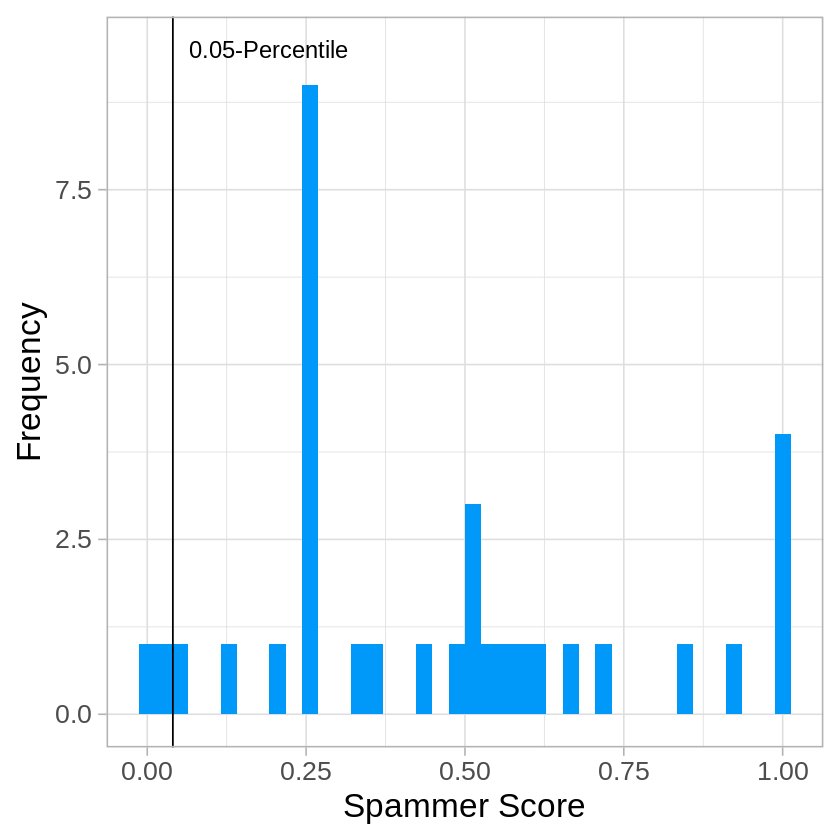

In [ ]:
df <- ParticipantWithSpammerScores %>% arrange(spammerScore)
ggplot(df, aes(x = spammerScore)) +
  geom_histogram(fill = "#0099f9", bins=40) +
  geom_vline(xintercept=Q1) +
  annotate("text", x=Q1+0.15, y=9.5, size=5, label="0.05-Percentile") +
  theme_light(base_size = 20) +
  xlab("Spammer Score") +
  ylab("Frequency")
ggsave('/content/spammers.pdf', width=7.2, height=6)

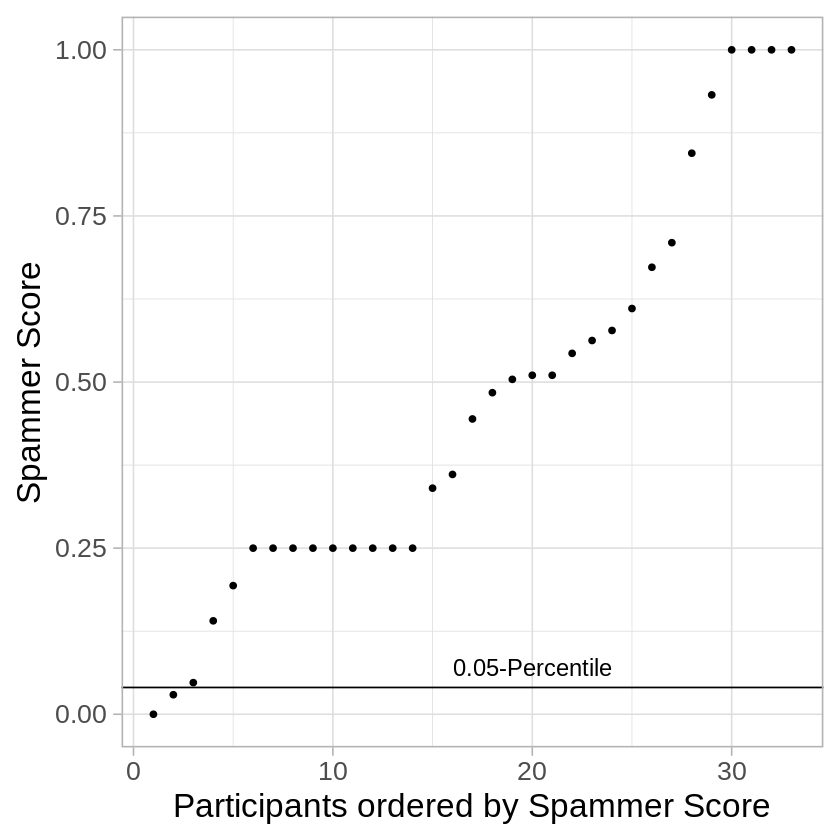

In [ ]:
ggplot(df, aes(x=1:nrow(df),y=spammerScore)) + 
    geom_point() +
    geom_hline(yintercept=Q1) +
    annotate("text", x=20, y=Q1+0.03, size=5, label="0.05-Percentile") +
  theme_light(base_size = 20) +
  xlab("Participants ordered by Spammer Score") +
  ylab("Spammer Score")
ggsave('/content/spammers.pdf', width=7.2, height=6)

In [ ]:
Spammers <- ParticipantWithSpammerScores %>% filter(spammerScore <= Q1)
Spammers

participantId,spammerScore
<chr>,<dbl>
1648f816-c31a-49a8-828e-68605e63a6eb,0.00000000
9ab5ae43-7f57-4562-b4ce-f1def5fcde62,0.02938776


In [ ]:
# Eliminate all feedback by spammers
nrow(Feedback)
Feedback <- Feedback[!(Feedback$participantId %in% Spammers$participantId),]
nrow(Feedback)

[1] 1997

[1] 1950

### Second result

In [ ]:
ResultDataset <- calc.majority.vote()
calc.irr()
head(ResultDataset)

`summarise()` has grouped output by 'contentId'. You can override using the
`.groups` argument.


Majority vote threshold:  5 
# Total Feedback:  1950 
# Total Sentences:  357 
# Sentences with majority votes:  316 
# Sentences with controverse majority votes:  24 
# Sentences with decided majority votes:  310 


 Krippendorff's alpha

 Subjects = 342 
   Raters = 31 
    alpha = 0.504 

,articleId,contentId,majorityVote,avgVote,votesBiased,votesNotBiased,classifierBiased,text,source,outlet
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,cdc102f5-88b2-4f1c-ba7d-9970ac9669cd,0,0.1428571,1,6,0,"""You think I'm joking,"" he continued. """,https://www.theblaze.com/news/biden-white-boy-not-stupid,TheBlaze
2,00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,cb534c0b-5bea-4ade-b5da-cd766f6d5ab7,0,0.1428571,1,6,0,"Speaking about the ""Divine Nine"" — the nine black Greek fraternities and sororities — Biden told the crowd that he is ""not stupid,"" despite being white, because he knows where the ""power is.""",https://www.theblaze.com/news/biden-white-boy-not-stupid,TheBlaze
3,00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,1c03f90d-54c0-4a9b-9309-1818488d294f,0,0.2857143,2,5,0,"I know where the power is.""",https://www.theblaze.com/news/biden-white-boy-not-stupid,TheBlaze
4,00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,be0165c0-fd53-438a-8fda-bb04df7d12e2,1,0.8888889,8,1,1,President Joe Biden made a bizarre race-related comment on Monday at a Black History Month event hosted at the White House.,https://www.theblaze.com/news/biden-white-boy-not-stupid,TheBlaze
5,00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,cd0a2226-c30d-428f-b29d-1e6344b618ac,0,0.2857143,2,5,0,"""And, by the way, you know I'm not — I may be a white boy, but I'm not stupid,"" he added, drawing laughter from the crowd. """,https://www.theblaze.com/news/biden-white-boy-not-stupid,TheBlaze
6,00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,f9d6c257-4cea-4006-9803-f39412469a3c,0,0.2857143,2,5,0,are guaranteed to vote for them.,https://www.theblaze.com/news/biden-white-boy-not-stupid,TheBlaze


In [ ]:
TotalAnnotators <- merge(Feedback, Content, by.x = "contentId", by.y = "id")
TotalAnnotators <- TotalAnnotators %>%
  group_by(articleId) %>%
  summarise(
    totalAnnotators = n_distinct(participantId)
  )

TotalAnnotators

articleId,totalAnnotators
<chr>,<int>
00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,11
0f8697f6-4de6-4e45-93f7-5bc689bf6548,7
0fb6287d-7e32-4867-adae-075531fb5003,12
3a93fcc6-bcf7-49f0-b58f-51c8a0a28eec,9
4f1be26f-f7fa-4234-919f-175825001232,6
66e17977-193e-4f5b-8acb-f1148adf3bbe,6
68be8d34-e8eb-4821-a8b8-4fb286174f40,8
99defa74-7917-4f11-80c4-3d470d075b91,6
9a4c7cda-fd8c-45ef-a7fe-ec7d7c70726b,13


In [ ]:
ArticleStats <- ResultDataset %>%
  group_by(articleId, outlet) %>%
  summarise(
    totalVotes = sum(votesBiased) + sum(votesNotBiased),
    votesPerSentence = totalVotes/n(),
    meanVote = mean(avgVote)
    # precisionClassifier = sum(classifierBiased & majorityVote) / sum(classifierBiased),
    # recallClassifier = sum(classifierBiased & majorityVote) / sum(majorityVote),
    # f1Classifier = 2 * (precisionClassifier * recallClassifier) / (precisionClassifier + recallClassifier)
  )
ArticleStats <- merge(ArticleStats, TotalAnnotators, by = "articleId")
ArticleStats

`summarise()` has grouped output by 'articleId'. You can override using the
`.groups` argument.


articleId,outlet,totalVotes,votesPerSentence,meanVote,totalAnnotators
<chr>,<chr>,<int>,<dbl>,<dbl>,<int>
00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,TheBlaze,139,7.722222,0.36571869,11
0f8697f6-4de6-4e45-93f7-5bc689bf6548,Alternet,188,5.222222,0.54153439,7
0fb6287d-7e32-4867-adae-075531fb5003,The Daily Beast,243,5.651163,0.15683832,12
3a93fcc6-bcf7-49f0-b58f-51c8a0a28eec,Reuters,172,5.548387,0.17035330,9
4f1be26f-f7fa-4234-919f-175825001232,The Guardian,86,5.058824,0.05490196,6
66e17977-193e-4f5b-8acb-f1148adf3bbe,The Daily Beast,48,5.333333,0.60000000,6
68be8d34-e8eb-4821-a8b8-4fb286174f40,Reuters,167,5.387097,0.06155914,8
99defa74-7917-4f11-80c4-3d470d075b91,The Daily Beast,170,5.151515,0.75252525,6
9a4c7cda-fd8c-45ef-a7fe-ec7d7c70726b,Breitbart,110,6.875000,0.28911210,13


In [ ]:
TotalSentences <- Content %>%
  group_by(articleId) %>%
  summarise(
    totalSentences = n()
  )

TotalSentences

articleId,totalSentences
<chr>,<int>
00d3bad9-ba2d-4a28-98f8-cc44fef37ae9,19
0f8697f6-4de6-4e45-93f7-5bc689bf6548,37
0fb6287d-7e32-4867-adae-075531fb5003,45
3a93fcc6-bcf7-49f0-b58f-51c8a0a28eec,33
4f1be26f-f7fa-4234-919f-175825001232,18
66e17977-193e-4f5b-8acb-f1148adf3bbe,35
68be8d34-e8eb-4821-a8b8-4fb286174f40,33
99defa74-7917-4f11-80c4-3d470d075b91,34
9a4c7cda-fd8c-45ef-a7fe-ec7d7c70726b,17


In [ ]:
df_combined <- Article %>%
  merge(TotalSentences, by.x = "id", by.y = "articleId") %>%
  merge(ArticleStats, by.x = "id", by.y = "articleId") %>%
  select(Title = title, "News outlet" = sitename, Date = date, Topic = topic, "# Sentences" = totalSentences, "Bias rating" = bias, "Political rating" = slant, "# Feedback" = totalVotes, "# Annotators" = totalAnnotators, "Feedback/Sentence" = votesPerSentence, "Classifier bias %" = biasPercentage, "Feedback bias %" = meanVote) %>%
  mutate_if(is.numeric, round, digits=4)

df_combined

df_combined %>%
  write.csv("article_summary.csv", row.names = FALSE)

Title,News outlet,Date,Topic,# Sentences,Bias rating,Political rating,# Feedback,# Annotators,Feedback/Sentence,Classifier bias %,Feedback bias %
<chr>,<chr>,<dttm>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Biden raises eyebrows with racial comment at Black History Month event: 'But I'm not stupid',TheBlaze,2023-02-28,blm,19,high,right,139,11,7.7222,0.2105,0.3657
Former Reagan speechwriter rips Greg Abbott for his 'cruel' and 'heartless' immigration stunts,Alternet,2022-12-27,immigration,37,high,left,188,7,5.2222,0.4737,0.5415
Climate Trauma Is Rewiring Our Brains Into Something Alarmingly Worse,The Daily Beast,2023-01-18,environment,45,medium,left,243,12,5.6512,0.1333,0.1568
Russian forces hammer Ukraine's Bakhmut in quest for breakthrough in war,Reuters,2023-02-28,international-politics-and-world-news,33,low,center,172,9,5.5484,0.0303,0.1704
FBI director endorses theory Covid-19 virus may have leaked from Chinese lab,The Guardian,2023-03-01,coronavirus,18,medium,left,86,6,5.0588,0.0000,0.0549
Republicans Really Want You to Keep Paying Junk Fees,The Daily Beast,2023-02-21,middle-class,35,high,left,48,6,5.3333,0.4571,0.6000
"Buffalo mass shooting gunman apologizes, sentenced to life without parole",Reuters,2023-02-15,gun-control,33,low,center,167,8,5.3871,0.0606,0.0616
Refusing to Forgive Institutional Racism Is Not Cancel Culture,The Daily Beast,2023-01-06,white-nationalism,34,high,left,170,6,5.1515,0.6765,0.7525
Irish Government Abandons Plan to Teach Children Gender is a ‘Spectrum’,Breitbart,2023-02-28,gender,17,high,right,110,13,6.8750,0.1765,0.2891


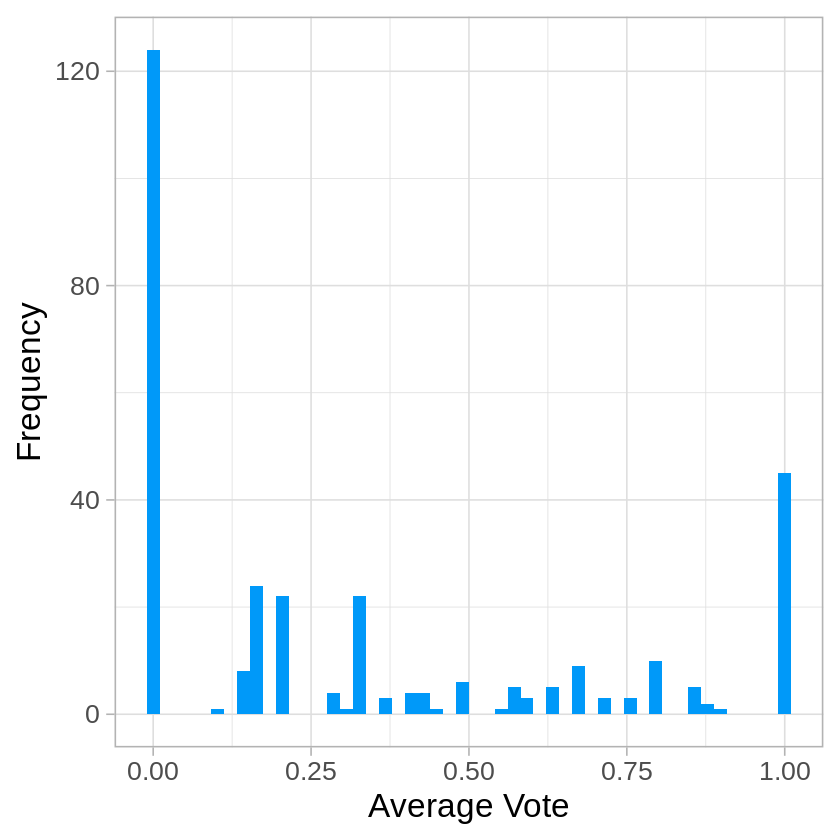

In [ ]:
ggplot(ResultDataset, aes(x = avgVote)) +
  geom_histogram(fill = "#0099f9", bins=50) +
  theme_light(base_size = 20) +
  xlab("Average Vote") +
  ylab("Frequency")
ggsave('/content/avg-vote.pdf', width=7.2, height=6)

In [ ]:
# Confusion matrix between classifier (pred) and majority votes (true)
table(ResultDataset$classifierBiased, ResultDataset$majorityVote)

   
     -1   0   1
  0   4 208  29
  1   2  10  63

In [ ]:
FeedbackWithReasons <- Feedback %>% filter(reason != "")

nrow(FeedbackWithReasons)
unique(FeedbackWithReasons$contentId)
FeedbackWithReasons

summary(FeedbackWithReasons)

[1] 25

[1] "3afd2b20-c82d-4561-ba57-b818c7965be7"
 [2] "f5dea5d9-ee54-48ee-b949-9b8b7593a207"
 [3] "7e539eaf-cd6e-4787-b0c4-b2fbbcf80626"
 [4] "68eb6d3a-8282-4f07-99d0-f50ccaf92268"
 [5] "cf824762-11f2-4088-aeed-9d3a69297fe4"
 [6] "8e88775d-6aaa-4005-968d-a03ab2c952af"
 [7] "bf9c53e8-02b5-4d96-9150-f5fb89803685"
 [8] "01639050-8d16-4c07-a743-1a04b86aeb46"
 [9] "4a2a4e70-1817-4b64-8cba-19818792d525"
[10] "22c02ade-a9fe-4fc1-8eaf-61dde8a6214d"
[11] "be0165c0-fd53-438a-8fda-bb04df7d12e2"
[12] "ecc632fc-3d4c-4049-9330-ab2735558a10"
[13] "8a358eea-28eb-4059-8a9c-90dcc1749668"
[14] "c6cdd519-2b85-4357-9708-7c8da6f07f49"
[15] "01293af8-8f73-4d1f-a0ea-2d430c7e82e6"
[16] "5162b5ad-cdf3-41cc-9b67-fbd6acbaaddd"
[17] "4ab24805-47bd-41a2-b2e3-48caf21f346b"
[18] "3c994c90-9a76-42e9-a7fd-b180767d7e8b"
[19] "1b861573-f6c4-49bb-9b06-023aa46c1bdb"
[20] "e55c1cd9-06d9-4fdc-a0d1-3805299b732c"
[21] "1d1da1e8-f689-4590-ae26-64c20c9934ac"
[22] "6d557d41-f238-4dbe-ad58-93efb0b1aa27"

id,participantId,contentId,biased,reason,createdAt
<chr>,<chr>,<chr>,<int>,<chr>,<int>
4bef6a27-6e9a-4673-9dbd-932fb0efffdf,c4528338-a227-48a0-913d-e77d3171b290,3afd2b20-c82d-4561-ba57-b818c7965be7,1,"""grilled""",1677928272
c90e404e-dc95-4913-ba09-69ba8f61a759,285e4ebc-149f-49d6-bf37-954e22bc1e2e,f5dea5d9-ee54-48ee-b949-9b8b7593a207,1,Pointing out that she was adopted,1677937648
2f90be9e-94f0-4874-87c8-ca98274f6b26,285e4ebc-149f-49d6-bf37-954e22bc1e2e,7e539eaf-cd6e-4787-b0c4-b2fbbcf80626,1,Living human being,1677937694
1f75540a-b487-4af3-9624-36cec149951c,285e4ebc-149f-49d6-bf37-954e22bc1e2e,68eb6d3a-8282-4f07-99d0-f50ccaf92268,1,Source?,1677937706
38266477-fb0e-4e49-bafd-ea7e047b1127,285e4ebc-149f-49d6-bf37-954e22bc1e2e,cf824762-11f2-4088-aeed-9d3a69297fe4,1,Source?,1677937713
cb65f1f9-39ee-41ab-ae82-003786db044f,c1a9569c-4107-4182-8126-bb67b6fbb1e7,8e88775d-6aaa-4005-968d-a03ab2c952af,1,The quotation marks placed in the sentence could suggest the author does not believe in gender ident,1678128183
4b948c30-1d88-4786-84d5-7dcf232cc033,c1a9569c-4107-4182-8126-bb67b6fbb1e7,bf9c53e8-02b5-4d96-9150-f5fb89803685,1,The speaker quoted is clearly biased,1678128495
3f795e98-a0ae-4b84-a3f5-aa0e75e397f3,71def624-3486-466a-b2f2-2af595ee19d9,01639050-8d16-4c07-a743-1a04b86aeb46,0,"Unbiased, since there is no positive or negative connotation.",1678135980
9868eee4-1462-4fed-929c-d1cf6b16e3e1,71def624-3486-466a-b2f2-2af595ee19d9,4a2a4e70-1817-4b64-8cba-19818792d525,1,"Yes because of the use of ""Ideology""",1678136134


      id            participantId       contentId             biased    
 Length:25          Length:25          Length:25          Min.   :0.00  
 Class :character   Class :character   Class :character   1st Qu.:1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :1.00  
                                                          Mean   :0.84  
                                                          3rd Qu.:1.00  
                                                          Max.   :1.00  
    reason            createdAt        
 Length:25          Min.   :1.678e+09  
 Class :character   1st Qu.:1.678e+09  
 Mode  :character   Median :1.678e+09  
                    Mean   :1.678e+09  
                    3rd Qu.:1.678e+09  
                    Max.   :1.679e+09  

In [ ]:
df <- FeedbackWithReasons %>%
  merge(Content, by.x = "contentId", by.y = "id")

summary(df)

  contentId              id            participantId         biased.x   
 Length:25          Length:25          Length:25          Min.   :0.00  
 Class :character   Class :character   Class :character   1st Qu.:1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :1.00  
                                                          Mean   :0.84  
                                                          3rd Qu.:1.00  
                                                          Max.   :1.00  
    reason            createdAt         indexInArticle  paragraphIndex 
 Length:25          Min.   :1.678e+09   Min.   : 1.00   Min.   : 0.00  
 Class :character   1st Qu.:1.678e+09   1st Qu.: 4.00   1st Qu.: 2.00  
 Mode  :character   Median :1.678e+09   Median : 6.00   Median : 3.00  
                    Mean   :1.678e+09   Mean   : 8.88   Mean   : 4.76  
                    3rd Qu.:1.678e+09   3rd Qu.:10.00   3rd Qu.: 5.00  
                    Max.   :1.679e+09   Max.   :31.00   M

## Create & export result dataset

In [ ]:
ResultDatasetForTraining <- ResultDataset %>% select(contentId, majorityVote, text) %>% filter(majorityVote != -1) %>% rename(
  id = contentId,
  label = majorityVote,
  text = text
)

head(ResultDatasetForTraining)

,id,label,text
,<chr>,<dbl>,<chr>
1,cdc102f5-88b2-4f1c-ba7d-9970ac9669cd,0,"""You think I'm joking,"" he continued. """
2,cb534c0b-5bea-4ade-b5da-cd766f6d5ab7,0,"Speaking about the ""Divine Nine"" — the nine black Greek fraternities and sororities — Biden told the crowd that he is ""not stupid,"" despite being white, because he knows where the ""power is."""
3,1c03f90d-54c0-4a9b-9309-1818488d294f,0,"I know where the power is."""
4,be0165c0-fd53-438a-8fda-bb04df7d12e2,1,President Joe Biden made a bizarre race-related comment on Monday at a Black History Month event hosted at the White House.
5,cd0a2226-c30d-428f-b29d-1e6344b618ac,0,"""And, by the way, you know I'm not — I may be a white boy, but I'm not stupid,"" he added, drawing laughter from the crowd. """
6,f9d6c257-4cea-4006-9803-f39412469a3c,0,are guaranteed to vote for them.


In [ ]:
# Export to CSV
write.csv(ResultDatasetForTraining, "new-dataset.csv", row.names=FALSE)